In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

- 勝率：WIN
- 敗率：LOSE
- 口座資金のユニット数：UNIT

$$
破産確率 = \left( \frac{1 - (WIN - LOSE)}{1 + (WIN - LOSE)} \right)^{UNIT}
$$

In [5]:
# 勝率
WIN = 0.56
# 敗率
LOSE = 1 - WIN
# ユニット数
UNIT = 5

# 破産確率
def p_ruin(win, unit):
    lose = 1 - win
    return min(1, ((1 - (win - lose)) / (1 + (win - lose)))**unit)

p = p_ruin(WIN, UNIT)
print('勝率：{}%、敗率：{}%、口座資金のユニット数：{}の時'.format(WIN*100, LOSE*100, UNIT))
print('破産確率：{0:.1f}%'.format(p*100))

勝率：56.00000000000001%、敗率：43.99999999999999%、口座資金のユニット数：5の時
破産確率：29.9%


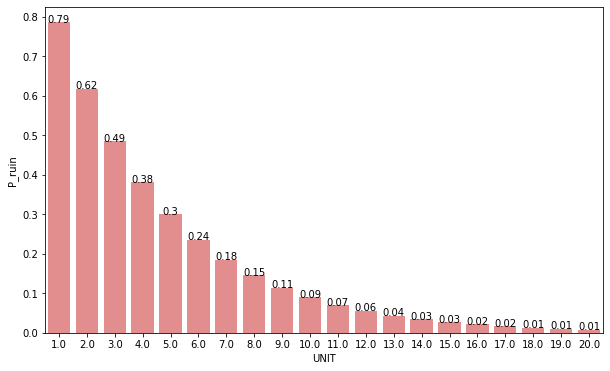

In [9]:
# ユニット数に対する破産確率の推移
units = list(range(1, 21))
probs = list(map(lambda x: p_ruin(0.56, x), units))
df = pd.DataFrame([units, probs]).T
df.columns = ['UNIT', 'P_ruin']
df['UNIT'].astype(int)
fig = plt.figure(figsize=(10,6))
g = sns.barplot(x='UNIT', y='P_ruin', color='lightcoral', data=df)
for idx, row in df.iterrows():
    g.text(idx, row['P_ruin'], round(row['P_ruin'], 2), color='black', ha='center')

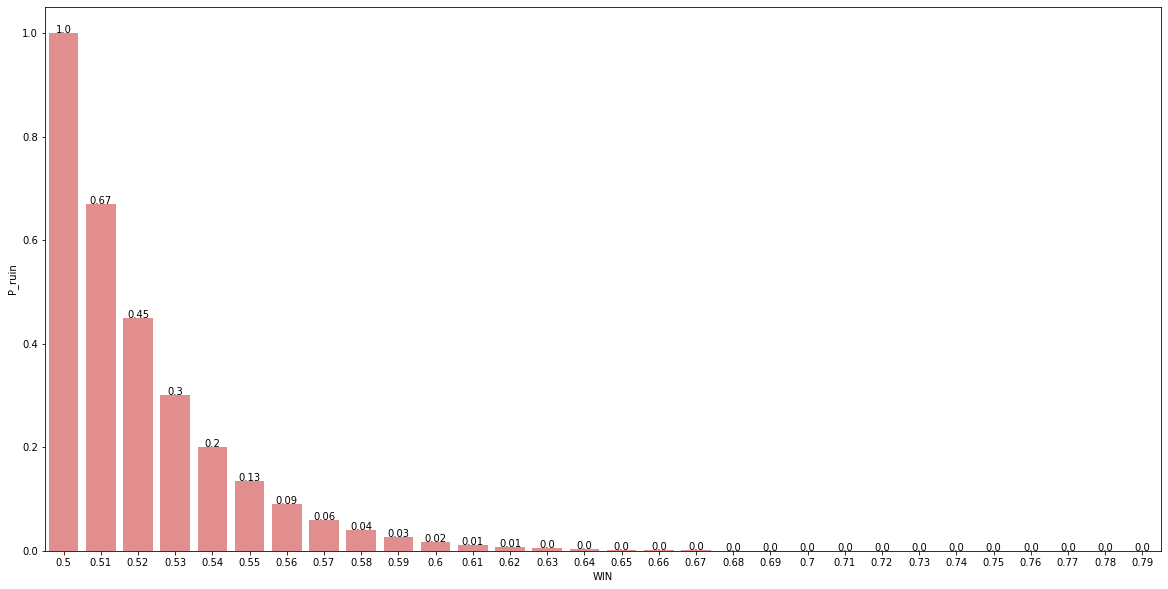

In [16]:
# 勝率に対する破産確率の推移
wins = list(map(lambda x: x / 100, range(50, 80, 1)))
probs_for_win = list(map(lambda x: p_ruin(x, 10), wins))
df_w = pd.DataFrame([wins, probs_for_win]).T
df_w.columns = ['WIN', 'P_ruin']
fig = plt.figure(figsize=(20,10))
g = sns.barplot(x='WIN', y='P_ruin', color='lightcoral', data=df_w)
for idx, row in df_w.iterrows():
    g.text(idx, row['P_ruin'], round(row['P_ruin'], 2), color='black', ha='center')